In [19]:
from pylab import *
import matplotlib.pyplot as plt
import pyAgrum.lib.notebook as gnb
import pyAgrum as gum
import os
#####image proc 
import pyAgrum.lib.image as gumimage 
from IPython.display import Image #to display exported images

#create Bayesian network
bn=gum.BayesNet('Matric Pass Rate')
print(bn)

#create the variables [add nodes]
em = bn.add(gum.LabelizedVariable('empStatus', 'employmentStatusofFeepayer', 2))
i = bn.add(gum.LabelizedVariable('avgIncome', 'avgFeepayerIncome', 2))
qn = bn.add(gum.LabelizedVariable('quintile', 'quintileGroup', 2))
tq = bn.add(gum.LabelizedVariable('teachQual', 'teacherQualification', 2))
ptr = bn.add(gum.LabelizedVariable('pupilTeacherRatio', 'pupilTeacherRatio', 2))
pm = bn.add(gum.LabelizedVariable('passingMatric', 'passingMatric', 2))
print (em,i,qn, tq, ptr, pm)
print (bn)


#create arcs
bn.addArc(em,i)
#compact the code 
for link in [(i,qn),(qn,tq),(qn,ptr), (tq,pm), (ptr,pm)]:
    bn.addArc(*link)
print(bn)

#print bn
bn




BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0, mem: 0o}
0 1 2 3 4 5
BN{nodes: 6, arcs: 0, domainSize: 64, dim: 6, mem: 96o}
BN{nodes: 6, arcs: 6, domainSize: 64, dim: 13, mem: 208o}


(pyAgrum.BayesNet<double>@0x55a2f43ae830) BN{nodes: 6, arcs: 6, domainSize: 64, dim: 13, mem: 208o}

In [20]:
# create probability tables 
bn.cpt(em).fillWith([0.3,0.7])

(pyAgrum.Potential<double>@0x55a2f412b910) 
  empStatus        |
0        |1        |
---------|---------|
 0.3000  | 0.7000  |

In [21]:
bn.cpt(i)[:]=[[0.971,0.029],
                         [0.645,0.355]]
bn.cpt(i)

(pyAgrum.Potential<double>@0x55a2f44e12a0) 
      ||  avgIncome        |
empSta||0        |1        |
------||---------|---------|
0     || 0.9710  | 0.0290  |
1     || 0.6450  | 0.3550  |

In [22]:
bn.cpt("quintile")[{'avgIncome':0}]=[0.987,0.013]
bn.cpt("quintile")[{'avgIncome':1}]=[0.840,0.16]
bn.cpt(qn)


(pyAgrum.Potential<double>@0x55a2f45dec90) 
      ||  quintile         |
avgInc||0        |1        |
------||---------|---------|
0     || 0.9870  | 0.0130  |
1     || 0.8400  | 0.1600  |

In [23]:
bn.cpt(ptr)[{'quintile':0}]=[0.227,0.773]
bn.cpt(ptr)[{'quintile':1}]=[0.840,0.16]
bn.cpt(ptr)


(pyAgrum.Potential<double>@0x55a2f37f4080) 
      ||  pupilTeacherRatio|
quinti||0        |1        |
------||---------|---------|
0     || 0.2270  | 0.7730  |
1     || 0.8400  | 0.1600  |

In [24]:
bn.cpt(tq)[{'quintile':0}]=[0.340,0.660]
bn.cpt(tq)[{'quintile':1}]=[0.038,0.962]
bn.cpt(tq)


(pyAgrum.Potential<double>@0x55a2f3cfb4e0) 
      ||  teachQual        |
quinti||0        |1        |
------||---------|---------|
0     || 0.3400  | 0.6600  |
1     || 0.0380  | 0.9620  |

In [25]:
bn.cpt(pm)[{'pupilTeacherRatio': 0, 'teachQual': 0}] = [0.380, 0.62]
bn.cpt(pm)[{'pupilTeacherRatio': 0, 'teachQual': 1}] = [0.179, 0.821]
bn.cpt(pm)[{'pupilTeacherRatio': 1, 'teachQual': 0}] = [0.720, 0.280]
bn.cpt(pm)[{'pupilTeacherRatio': 1, 'teachQual': 1}] = [0.616, 0.384]
bn.cpt(pm)


(pyAgrum.Potential<double>@0x55a2f35da970) 
             ||  passingMatric    |
teachQ|pupilT||0        |1        |
------|------||---------|---------|
0     |0     || 0.3800  | 0.6200  |
1     |0     || 0.1790  | 0.8210  |
0     |1     || 0.7200  | 0.2800  |
1     |1     || 0.6160  | 0.3840  |

In [26]:
gnb.flow.row(bn, gnb.getInference(bn))


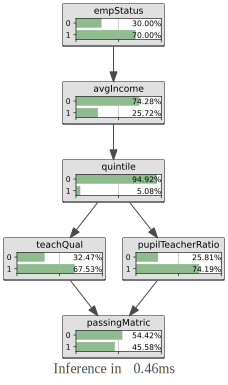

In [28]:
gnb.showInference(bn)


In [29]:
gnb.flow.row(bn)


In [33]:
ie = gum.VariableElimination(bn)
ie.setEvidence({'pupilTeacherRatio':1})
ie.makeInference()
ie.posterior('quintile')[0]


0.989041861255623

In [34]:
ie = gum.VariableElimination(bn)
ie.setEvidence({'quintile':1})
ie.makeInference()
ie.posterior('avgIncome')[1]

0.8099448122751356